## 练习 4-2
在噪声信号中，频率的混合随时间而变化。长时来看，我们预计所有频率的功率都是相等的，但在样本中，每个频率的功率都是随机的。
为了估算每个频率的长期平均功率，我们可以将长信号分解为多个分段，计算每个分段的功率谱，然后计算整个分段的平均值分段。

实现Bartlett方法并使用它来估计功率噪声波的频谱。

Bartlett,Welch和Blackman-Turkey方法都是用于估计信号功率谱密度（PSD）的算法。
其中Bartlett是将信号分帧后分别进行FFT取平均值；而Welch在此基础上，增加了帧移（Overlap）;
Blackman-Turkey则是通过估计信号的自相关函数，再对自相关函数做FFT（自相关函数与PSD为傅里叶变换对）。

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa
from IPython.display import Audio

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "Times New Roman"]  # 使用系统中存在的字体

In [35]:
sg, fs = librosa.load(r"D:\course\CUC_0\Py_dsp_learn\Sample_sound\rain-from-inside.wav")  # 雨声
f_bartlett, pxx_bartlett = signal.welch(sg, fs, window='boxcar', nperseg=1024, noverlap=0)  # welch方法在 overlap=0 时，即为bartltt法

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

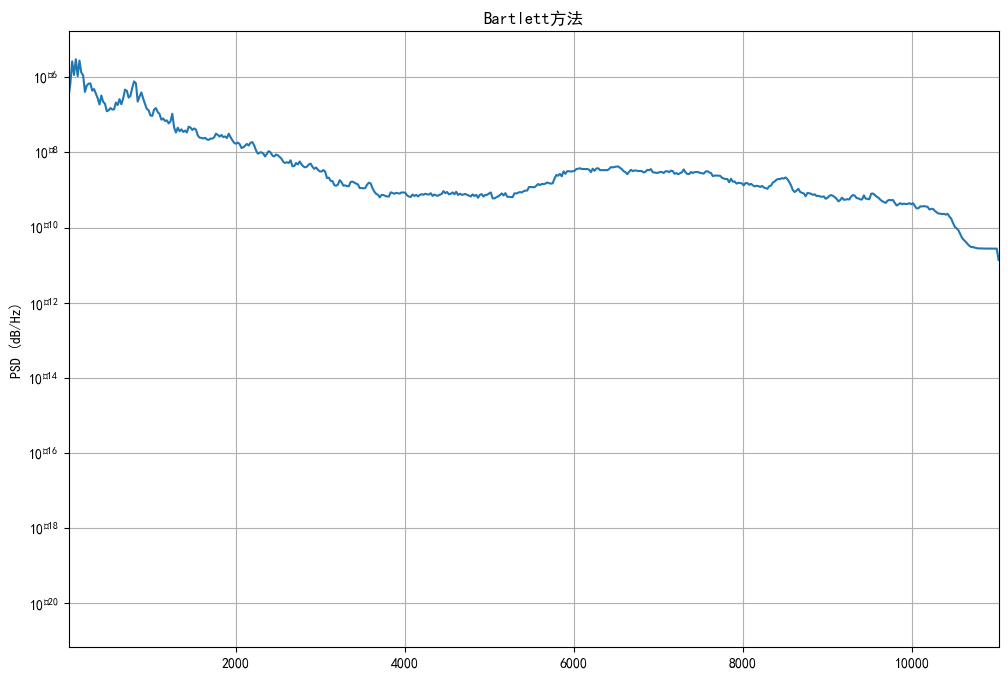

In [36]:
plt.figure(figsize=(12, 8))
plt.semilogy(f_bartlett, pxx_bartlett)
plt.title('Bartlett方法')
plt.xlim(f_bartlett[1], f_bartlett[-1])
plt.ylabel('PSD (dB/Hz)')
plt.grid(True)

相比于直接对整段信号做FFT得到的频谱，分段计算平均得到的PSD看起来更加分布均匀，直观上更符合噪声的特点。